[Based on this tutorial](https://www.codementor.io/python/tutorial/data-science-python-pandas-r-dimensionality-reduction)

In [1]:
%pylab inline 
import pandas as pd 
import urllib 

Populating the interactive namespace from numpy and matplotlib


In [8]:
tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
local_tb_existing_file = 'tb_existing_100.csv'
existing_f = urllib.urlretrieve(tb_existing_url_csv, local_tb_existing_file)


In [9]:
!ls

tb_existing_100.csv
Untitled.ipynb


In [10]:
import pandas as pd 

In [13]:
!head tb_existing_100.csv

"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34
Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9
Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35


In [11]:
existing_df = pd.read_csv(local_tb_existing_file,index_col=0,thousands=',')

In [16]:
existing_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
"TB prevalence, all forms (per 100 000 population per year)",,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [19]:
existing_df.index.name='country'

In [22]:
existing_df.columns.names=['year']

In [25]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [26]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)


In [29]:
pca.fit(existing_df)

PCA(copy=True, n_components=2, whiten=False)

In [30]:
existing_2d = pca.transform(existing_df)

In [32]:
existing_df_2d = pd.DataFrame(existing_2d)

In [34]:
existing_df_2d.index = existing_df.index

In [37]:
existing_df_2d.columns=['PC1','PC2']

In [39]:
existing_df_2d.columns.name='Principal Components'

In [41]:
existing_df_2d.head()

Principal Components,PC1,PC2
country,,
Afghanistan,-732.215864,203.381494
Albania,613.296510,4.715978
Algeria,569.303713,-36.837051
American Samoa,717.082766,5.464696
Andorra,661.802241,11.037736


In [42]:
print(pca.explained_variance_ratio_)

[ 0.91808789  0.060556  ]


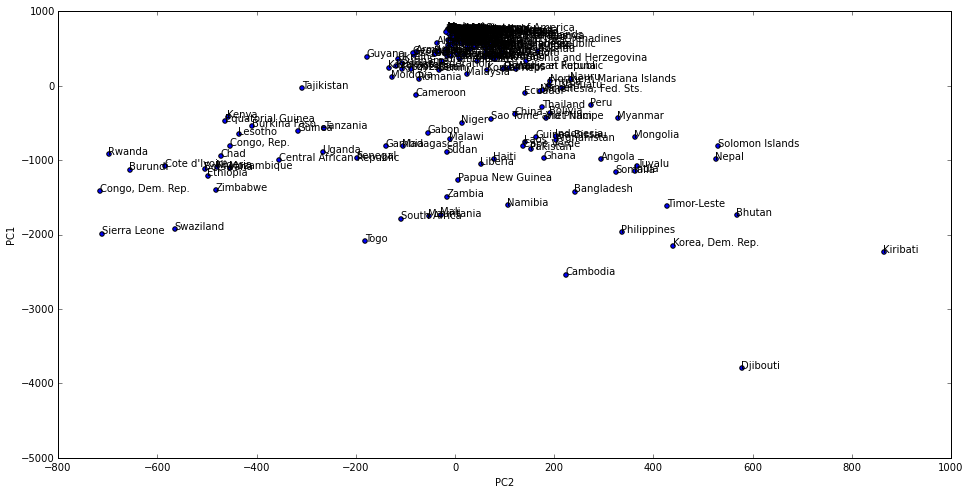

In [49]:
ax = existing_df_2d.plot(kind='scatter', x='PC2',y='PC1',figsize=(16,8))
for i, country in enumerate(existing_df.index):
    ax.annotate(country,(existing_df_2d.iloc[i].PC2,existing_df_2d.iloc[i].PC1))

In [51]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [53]:
existing_df_2d['country_mean']=existing_df.mean(axis=1)

In [54]:
existing_df_2d.head()

Principal Components,PC1,PC2,country_mean
country,,,
Afghanistan,-732.215864,203.381494,353.333333
Albania,613.296510,4.715978,36.944444
Algeria,569.303713,-36.837051,47.388889
American Samoa,717.082766,5.464696,12.277778
Andorra,661.802241,11.037736,25.277778


In [57]:
min_val = existing_df_2d.country_mean.min()
max_val = existing_df_2d.country_mean.max()

In [61]:
existing_df_2d['country_mean_scaled']=(existing_df_2d.country_mean - min_val)/max_val

In [62]:
existing_df_2d.head()

Principal Components,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,-732.215864,203.381494,353.333333,0.329731
Albania,613.296510,4.715978,36.944444,0.032420
Algeria,569.303713,-36.837051,47.388889,0.042234
American Samoa,717.082766,5.464696,12.277778,0.009240
Andorra,661.802241,11.037736,25.277778,0.021457


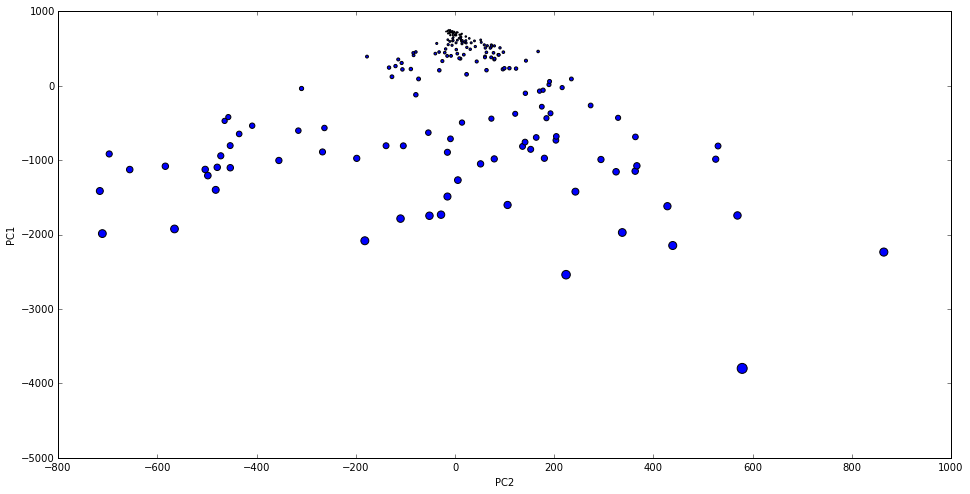

In [63]:
existing_df_2d.plot(kind='scatter',x='PC2',y='PC1',s=existing_df_2d['country_mean_scaled']*100,figsize=(16,8))

In [48]:
rom sklearn.preprocessing import normalize

existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = 
    (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
        country_mean_scaled, 
        index=existing_df_2d.index) 
existing_df_2d.head()

In [64]:
existing_df_2d['country_sum']=existing_df.sum(axis=1)
min_val = existing_df_2d.country_sum.min()
max_val = existing_df_2d.country_sum.max()
existing_df_2d['country_sum_scaled']=(existing_df_2d.country_sum - min_val)/max_val


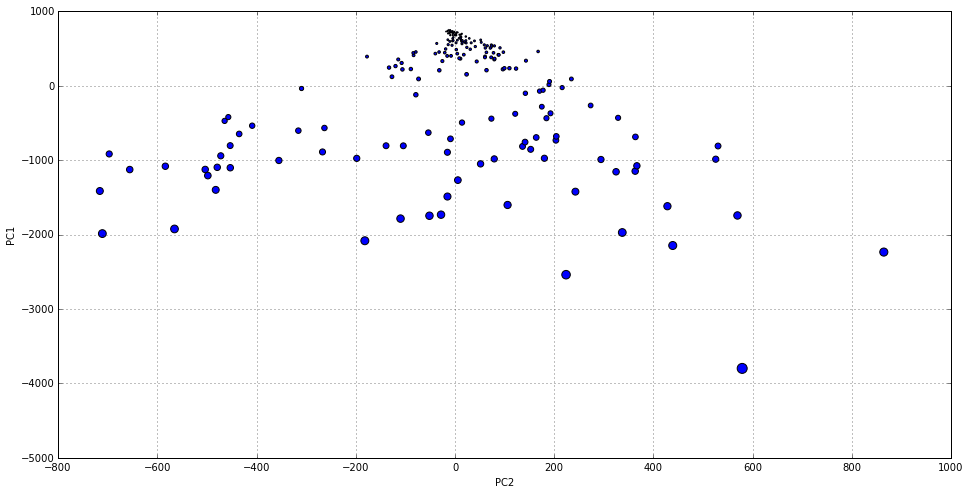

In [66]:
existing_df_2d.plot(kind='scatter',x='PC2',y='PC1',s=existing_df_2d['country_sum_scaled']*100,figsize=(16,8),grid='on')

In [79]:
pd.DataFrame((existing_df['2007'] - existing_df['1990'])).sort([0],ascending=False).head()

,0
country,
Sierra Leone,476
Rwanda,400
"Congo, Dem. Rep.",391
Burundi,359
Lesotho,343


In [81]:
existing_df_2d['country_change'] = existing_df['2007'] - existing_df['1990']

In [83]:
min_val = existing_df_2d.country_change.min()
max_val = existing_df_2d.country_change.max()
existing_df_2d['country_change_scaled']=(existing_df_2d.country_change - min_val)/max_val

In [84]:
existing_df_2d[['country_change','country_change_scaled']].head()


Principal Components,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


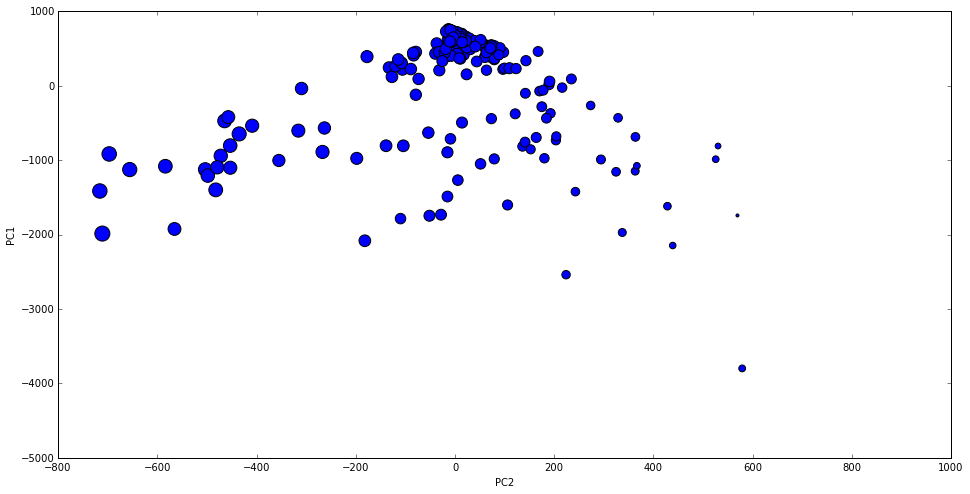

In [85]:
existing_df_2d.plot(kind='scatter',x='PC2',y='PC1',s=existing_df_2d['country_change_scaled']*100,figsize=(16,8))

In [86]:
existing_df_2d.loc['Djibouti']

Principal Components
PC1                      -3798.447446
PC2                        578.975277
country_mean              1064.166667
country_mean_scaled          0.997703
country_sum              19155.000000
country_sum_scaled           0.997703
country_change            -381.000000
country_change_scaled        0.466387
Name: Djibouti, dtype: float64

In [87]:
existing_df.loc['Djibouti']

year
1990    1485
1991    1477
1992    1463
1993    1442
1994    1414
1995    1381
1996     720
1997     669
1998     698
1999     701
2000     761
2001     775
2002     932
2003     960
2004    1034
2005    1046
2006    1093
2007    1104
Name: Djibouti, dtype: int64

In [91]:
existing_df_2d.loc['United States of America']

Principal Components
PC1                      749.043141
PC2                       -9.326693
country_mean               4.888889
country_mean_scaled        0.002297
country_sum               88.000000
country_sum_scaled         0.002297
country_change            -4.000000
country_change_scaled      1.258403
Name: United States of America, dtype: float64

In [95]:
existing_df_2d.sort(['PC1'],ascending=False).head()

Principal Components,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled
country,,,,,,,,
Monaco,759.525361,-13.312820,2.444444,0.000000,44,0.000000,-1,1.264706
Iceland,756.172711,-12.528394,3.222222,0.000731,58,0.000731,-2,1.262605
Sweden,750.538270,-13.357630,4.555556,0.001984,82,0.001984,0,1.266807
United States of America,749.043141,-9.326693,4.888889,0.002297,88,0.002297,-4,1.258403
Canada,748.125458,-11.062861,5.111111,0.002506,92,0.002506,-3,1.260504
